# Does size matter in Powerlifting?

#### What really contributes to strength in the major lifts (Squat, Bench, Deadlift)? 

This page uses data from the OpenPowerlifting project, https://www.openpowerlifting.org. 
You may download a copy of the data at https://gitlab.com/openpowerlifting/opl-data. 

Author: Aman Kalsi

#### Note: This notebook is analyzing data on many experienced Powerlifters. Extrapolating this data to the average human being may not be the best idea since there are many extraneous variables (lifestyle choices, years of experience, quality of nutrition, etc.) that greatly set apart average gym attendees to these experienced Powerlifters. With that being said, I hope you enjoy the analysis conducted within this Jupyter notebook.

### ---------------------------------------------------------------------------------------------------------------------------------------------------------------

# Introduction

Fitness has been around and will be around for many generations. Many people have heard of bodybuilding, and the individual that comes to mind when people think of this field of fitness is Arnold Schwarzenegger in his prime. Essentially, when people think of bodybuilding, people think of a ripped physique with shredded muscles, but often condone actual strength measurements. This is where Powerlifting comes in.
   
Powerlifting is a form of exercise in which an individuals actual strength (power) is measured. In Powerlifting competitions, strength is measured via three lifts: Squat, Bench Press, and Deadlift.

The Squat looks like this:
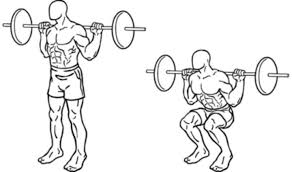

The Bench Press looks like this:
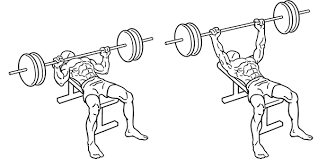

and the Deadlift looks like this:
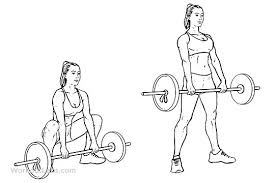

Also, for reference, this is Arnold in his prime:
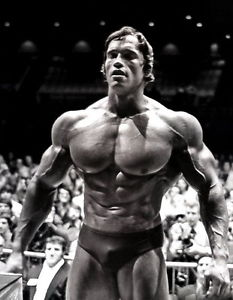

and this is a well known Powerlifter (Mark Henry).
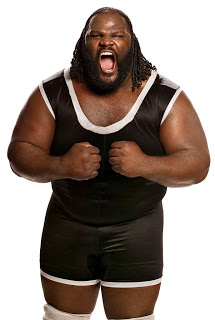

In this notebook, we will take a look at what variables most directly relate to strength. Hopefully, by the end of this notebook, you will have a changed perception of what strength truly looks like, and what factors contribute to it!

### ---------------------------------------------------------------------------------------------------------------------------------------------------------------

# Outline

1. Imports
2. Accumulating and Cleaning data
3. Exploratory Data Analysis
4. Cleaning data further for Correlational and Regression analysis
5. Heatmap Correlations
6. Multiple Linear Regression
7. Conclusion

### ---------------------------------------------------------------------------------------------------------------------------------------------------------------

# Part 1: Imports

In [2]:
# Used to aid in dataframe manipulation and analysis
import pandas as pd

# Used to manipulate structured data
import numpy as np

# Used to aid in plotting data
import matplotlib.pyplot as plt
import seaborn as sns

# Used for machine learning and multiple linear regression
from sklearn import linear_model
from sklearn import model_selection
import statsmodels.api as stat_mod_forms

# Used to simply ignore warnings throughout the notebook
import warnings
warnings.filterwarnings("ignore")

### ---------------------------------------------------------------------------------------------------------------------------------------------------------------

# Part 2: Accumulating and Cleaning Data

In [3]:
data = pd.read_csv("openpowerlifting.csv")
data.head()

,Name,Sex,Event,Equipment,Age,Division,BodyweightKg,WeightClassKg,Squat1Kg,Squat2Kg,...,McCulloch,Tested,AgeClass,Country,Glossbrenner,Federation,Date,MeetCountry,MeetState,MeetName
0,Angie Belk Terry,F,SBD,Wraps,47.0,Mst 45-49,59.60,60,38.56,47.63,...,167.76,No,45-49,NaN,137.00,365Strong,2016-10-29,USA,NC,Junior & Senior National Powerlifting Champion...
1,Dawn Bogart,F,SBD,Single-ply,42.0,Mst 40-44,58.51,60,120.20,136.08,...,465.50,No,40-44,NaN,403.37,365Strong,2016-10-29,USA,NC,Junior & Senior National Powerlifting Champion...
2,Dawn Bogart,F,SBD,Single-ply,42.0,Open Senior,58.51,60,120.20,136.08,...,465.50,No,40-44,NaN,403.37,365Strong,2016-10-29,USA,NC,Junior & Senior National Powerlifting Champion...
3,Dawn Bogart,F,B,Raw,42.0,Open Senior,58.51,60,NaN,NaN,...,110.46,No,40-44,NaN,95.71,365Strong,2016-10-29,USA,NC,Junior & Senior National Powerlifting Champion...
4,Destiny Dula,F,BD,Raw,18.0,Teen 18-19,63.68,67.5,NaN,NaN,...,138.29,No,18-19,NaN,115.19,365Strong,2016-10-29,USA,NC,Junior & Senior National Powerlifting Champion...


In [4]:
data.describe()

,Age,BodyweightKg,Squat1Kg,Squat2Kg,Squat3Kg,Squat4Kg,Best3SquatKg,Bench1Kg,Bench2Kg,Bench3Kg,...,Best3BenchKg,Deadlift1Kg,Deadlift2Kg,Deadlift3Kg,Deadlift4Kg,Best3DeadliftKg,TotalKg,Wilks,McCulloch,Glossbrenner
count,584452.000000,885640.000000,279966.000000,276358.000000,268409.000000,3075.000000,599776.000000,408493.000000,403327.000000,391166.000000,...,806275.000000,299535.000000,293294.000000,280041.000000,7694.000000,654665.000000,838240.000000,832738.000000,832738.000000,832738.000000
mean,31.506642,85.972347,114.301902,92.073628,29.345705,71.875695,185.638512,83.745347,54.763217,-18.739220,...,126.497058,163.760078,130.443903,12.378306,81.134699,201.188666,403.695272,288.334276,297.571202,272.398978
std,13.005275,22.932870,148.350489,174.968664,201.601667,194.685330,72.794909,105.986270,130.987863,144.722126,...,56.509481,108.890301,163.848153,216.144488,191.564789,62.845080,217.240304,135.412594,137.853492,129.001209
min,4.500000,15.880000,-555.000000,-580.000000,-600.500000,-550.000000,-477.500000,-480.000000,-507.500000,-575.000000,...,-522.500000,-422.500000,-470.000000,-502.500000,-461.000000,-410.000000,2.500000,1.470000,0.000000,1.410000
25%,21.500000,68.600000,90.000000,67.500000,-170.000000,-107.500000,132.500000,57.500000,-54.200000,-140.000000,...,85.000000,127.000000,115.000000,-212.500000,-95.000000,152.500000,215.000000,150.600000,157.220000,142.722500
50%,28.000000,82.500000,150.000000,145.000000,110.000000,135.000000,182.500000,105.000000,95.000000,-62.500000,...,124.740000,180.000000,180.000000,117.500000,147.500000,202.500000,390.000000,313.370000,323.290000,293.590000
75%,39.500000,100.000000,200.000000,205.000000,192.500000,205.000000,230.000000,145.000000,145.000000,117.500000,...,160.000000,227.500000,230.000000,205.000000,210.000000,245.000000,567.500000,388.920000,400.150000,369.380000
max,96.000000,258.000000,555.000000,566.990000,560.000000,505.500000,575.000000,467.500000,487.500000,478.540000,...,488.500000,450.000000,460.400000,457.500000,418.000000,460.400000,1367.500000,779.380000,796.220000,742.960000


From visually inspecting the data, we see that we have all three attempts for the three lifts, and that some of these lifts contain negative values. These negative values represent failed attempts, but we are only concerned with the best successful performances of each lift. Furthermore, we only would like to include data from the tested lifters in our analysis, since performance enhancing drugs can skew our data. After this, we can drop the kg columns and replace them with lb measurements to ease interpretation of the data. Finally, we can drop all the null rows from the columns we are working with. As a result, we can clean this data to represent only the values and observations that we require.

In [5]:
# Drop all unnecessary colummns
data = data.drop(['Squat1Kg', 'Squat2Kg', 'Squat3Kg', 'Squat4Kg'], axis=1)
data = data.drop(['Bench1Kg', 'Bench2Kg', 'Bench3Kg', 'Bench4Kg'], axis=1)
data = data.drop(['Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg', 'Deadlift4Kg'], axis=1)

# Only include tested lifters
data = data[data['Tested'] == 'Yes']
data = data.drop(['Tested'], axis=1)
data = data.drop(['WeightClassKg'], axis=1)

# Include only adult lifters (above the age of 18)
data = data.loc[data['Age'] >= 18]

# Rename columns for easier interpretation
data.columns = ['Name', 'Sex', 'Event', 'Equipment', 'Age', 'Division', 'Bodyweight', 'Squat', 
                'Bench', 'Deadlift', 'Total', 'Place', 'Wilks', 'McCulloch', 'Age_Class', 'Country',
                'Glossbrenner', 'Federation', 'Date', 'Meet_Country', 'Meet_State', 'Meet_Name']

# Convert all kg values to lbs
data['Bodyweight'] = round(data['Bodyweight'] * 2.20462, 2)
data['Squat'] = round(data['Squat'] * 2.20462, 2)
data['Bench'] = round(data['Bench'] * 2.20462, 2)
data['Deadlift'] = round(data['Deadlift'] * 2.20462, 2)
data['Total'] = round(data['Total'] * 2.20462, 2)

# Only include successful lifts (negative lifts represent failed lift attempts)
data = data[data.Squat > 0]
data = data[data.Bench > 0]
data = data[data.Deadlift > 0]

# Since these columns are especially important, drop all null rows
data = data[pd.notnull(data['Age'])]
data = data[pd.notnull(data['Age_Class'])]
data = data[pd.notnull(data['Total'])]

data.describe()

,Age,Bodyweight,Squat,Bench,Deadlift,Total,Wilks,McCulloch,Glossbrenner
count,186580.000000,186205.000000,186580.000000,186580.000000,186580.000000,186580.000000,186205.000000,186205.000000,186205.000000
mean,31.314131,184.655394,418.832025,273.326039,455.918066,1148.073813,381.275934,394.944597,358.424031
std,11.655826,48.699379,154.465350,112.788185,133.979393,387.382418,83.000561,82.806957,81.861458
min,18.000000,55.010000,29.980000,20.060000,39.900000,89.950000,37.290000,43.440000,35.880000
25%,22.500000,147.930000,297.620000,181.880000,347.230000,832.240000,324.390000,337.150000,301.630000
50%,27.500000,180.120000,407.850000,270.070000,462.970000,1151.910000,376.610000,390.110000,355.650000
75%,37.500000,214.990000,518.090000,347.230000,551.160000,1416.470000,435.070000,450.530000,412.670000
max,95.500000,534.400000,1113.330000,914.920000,947.990000,2805.380000,690.710000,729.210000,664.210000


This is much better. We have gotten rid of the failed attempted lifts, untested lifters, and have successfully converted the kg measurements to lb measurements. Now the data looks more interpretable and consistent to what we are trying to find.

### ---------------------------------------------------------------------------------------------------------------------------------------------------------------

# Part 3: Exploratory Data Analysis

In this part of the notebook, we will form Exporatory Data Analysis. First we will see the data based on age and gender, and inspect similarites/differences between the genders. Then, we will see the data based on age, country, and equipment, separately. Throughout the rest of the notebook, when referring to strength, we will refer to an individual's total weight lifted (Squat + Bench Press + Deadlift). The higher an individual's total, the more strength he/she has. For a frame of reference, in his prime, Arnold Schwarzenegger's total was 1,695 lbs (545 lb Squat, 440 lb Bench Press, 710 lb Deadlift). Let's get started.

First, lets see how many females and males we have in this dataset:

In [6]:
data['Sex'].value_counts()

M    129856
F     56724
Name: Sex, dtype: int64

Our data consists of approximately 30.2% females and 69.8% males. Now, lets visualize the data.

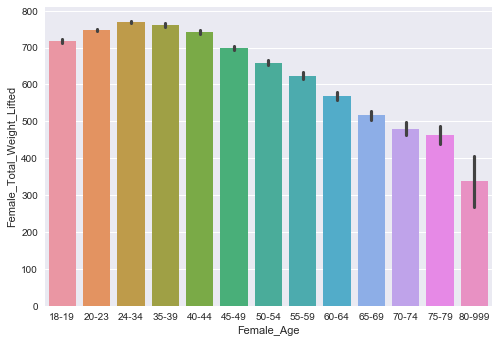

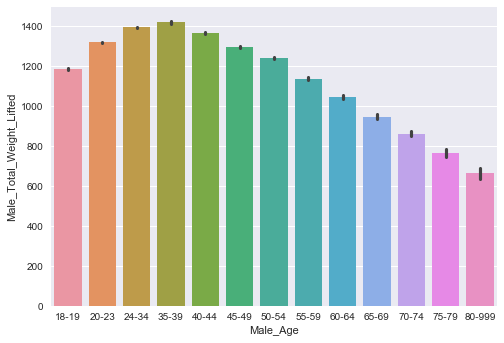

In [7]:
# Create a female and male dataframe and graph them separately based on age
females = data[data['Sex'] == 'F']
females = females.sort_values(by=['Age'])
males = data[data['Sex'] == 'M']
males = males.sort_values(by=['Age'])

females_graph = sns.barplot(x='Age_Class', y='Total', data=females)
females_graph.set(xlabel='Female_Age', ylabel='Female_Total_Weight_Lifted')
sns.plt.show()

males_graph = sns.barplot(x='Age_Class', y='Total', data=males)
males_graph.set(xlabel='Male_Age', ylabel='Male_Total_Weight_Lifted')
sns.plt.show()

As it can be seen, it seems that both males and females see peek performance between the ages of 24-39. Although it is not surprising that males are seen to have higher lifting totals on average than females simply due to naturally higher levels of testosterone, it is fascinating to see the similarity in trends on these graphs. The data for both genders seems to be skewed to the right.

Next, we can take a look at the age data within this dataframe.

In [8]:
# See the age classes in the data
strongest = data
strongest['Age_Class'].unique()

array(['18-19', '35-39', '20-23', '40-44', '24-34', '50-54', '45-49',
       '70-74', '60-64', '65-69', '55-59', '75-79', '80-999'], dtype=object)

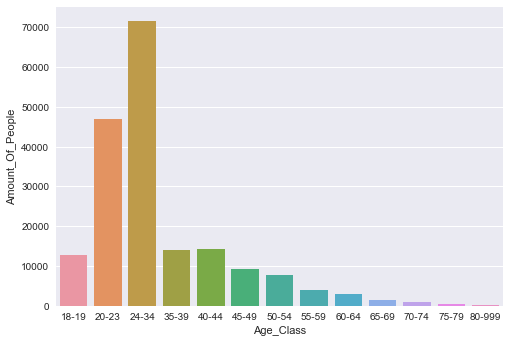

In [9]:
# Get the count of the age of individuals
top_age = strongest['Age_Class'].value_counts().rename_axis('Age').reset_index(name='Count')
top_age = top_age.sort_values(by=['Age'])

# graph this data frame
strongest_graph = sns.barplot(x='Age', y='Count', data=top_age)
strongest_graph.set(xlabel='Age_Class', ylabel='Amount_Of_People')
sns.plt.show()

It seems that majority of the individuals in this dataset are between the ages 20-34. Overall, we can see a larger participation of younger individuals in these Powerlifting competitions.

Next, let's take a look at the countries represented by this dataset.

In [10]:
# View the unique entries in the Country column
strongest['Country'].unique()

array(['USA', nan, 'Australia', 'Puerto Rico', 'Nigeria', 'Canada',
       'India', 'South Korea', 'Spain', 'Libya', 'South Africa', 'Algeria',
       'Egypt', 'Morocco', 'Iran', 'France', 'Cambodia', 'Lebanon',
       'Ivory Coast', 'UK', 'Russia', 'Azerbaijan', 'Ukraine', 'Mongolia',
       'Israel', 'Ireland', 'Moldova', 'New Zealand', 'Kazakhstan',
       'Taiwan', 'Uzbekistan', 'Philippines', 'Japan', 'Tajikistan',
       'Pakistan', 'Turkmenistan', 'Indonesia', 'Nepal', 'Hong Kong',
       'Iraq', 'Oman', 'Kyrgyzstan', 'UAE', 'Afghanistan', 'Sri Lanka',
       'Turkey', 'Singapore', 'Niue', 'Malaysia', 'Syria', 'Wales',
       'England', 'N.Ireland', 'Scotland', 'Netherlands', 'Italy',
       'Slovenia', 'Germany', 'Belgium', 'Switzerland', 'Austria',
       'West Germany', 'Trinidad and Tobago', 'Papua New Guinea', 'Nauru',
       'Kiribati', 'Tuvalu', 'Samoa', 'Guyana', 'Denmark', 'Czechia',
       'Poland', 'Slovakia', 'Lithuania', 'Sweden', 'Brazil', 'Norway',
       'Finland

There are many countries represented in this set. Let's find and save the top five, and visualize this data.

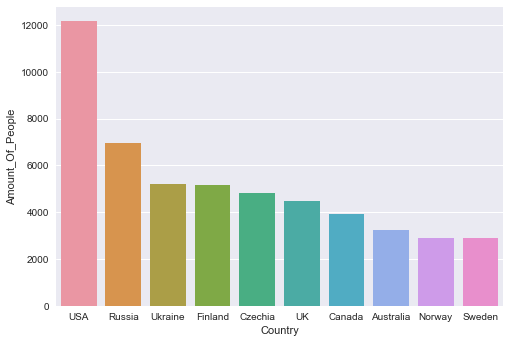

In [11]:
# Save the top ten represented countries in a data frame
top_ten_countries = (strongest['Country'].value_counts().head(10)).rename_axis('Country').reset_index(name='Count')

# graph this data frame
strongest_graph = sns.barplot(x='Country', y='Count', data=top_ten_countries)
strongest_graph.set(xlabel='Country', ylabel='Amount_Of_People')
sns.plt.show()

It can be seen that the USA has quite a substantial lead among the other countries. This can be largely because these competitions are based in the United States. In order to see the countries represented by the strongest individuals, we can take a look at the top ten lifters, and then visualize their countries of origin.

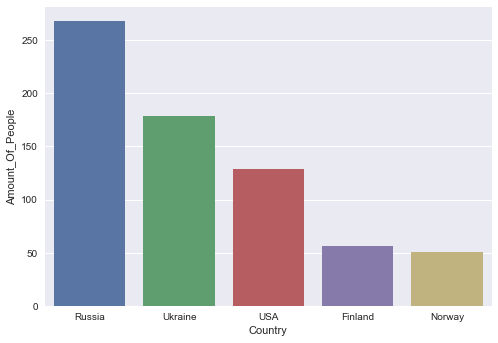

In [12]:
# Since we are dealing with only the top 1000 lifters, we can go and inspect only the top five countries instead of the top ten
strongest_countries = data.sort_values('Total', ascending = [False]).head(1000)
strongest_countries_with_counts = (strongest_countries['Country'].value_counts().head(5)).rename_axis('Country').reset_index(name='Count')

# graph this data frame
strongest_graph = sns.barplot(x='Country', y='Count', data=strongest_countries_with_counts)
strongest_graph.set(xlabel='Country', ylabel='Amount_Of_People')
sns.plt.show()

As expected, it seems that the USA's numbers were bloated due to the fact that most of the competitions were held in the United States. By looking at the top 1000 strongest lifters in the data, we see that an astounding majority of them are from Russia descent. In fact, Russia has almost double the amount of individuals in the top 1000 than the United States, which was the top in our previous analysis.

Next, for the last part of the EDA, we can take a look at which forms of equipment were most used in the data.

In [13]:
# Take a look at unique equipment
data['Equipment'].unique()

array(['Raw', 'Wraps', 'Multi-ply', 'Single-ply'], dtype=object)

As introduced by the array above, raw equipment means that no equipment was used throughout the lift. Wraps usually refer to wrist wraps (which help tremendously with grip) or knee wraps (which help stabilize and secure your knees throughout the lift). Single-ply and Multi-ply refer to the type of Powerlifting suits that individuals may have used throughout the lift. Powerlifting suits are made of very high strength fabrics which fit back to place quickly after being stretched. Single-ply means the suit has one layer of fabric, whereas Multi-ply means the suit has two or more layers of fabric.

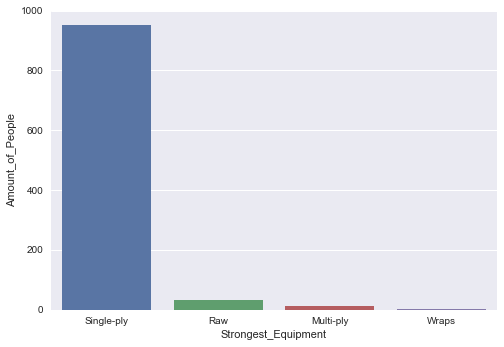

In [14]:
# Save the counts of each equipment in a dataframe
top_equipment = (strongest_countries['Equipment'].value_counts()).rename_axis('Equipment').reset_index(name='Count')

strongest_graph = sns.barplot(x='Equipment', y='Count', data=top_equipment)
strongest_graph.set(xlabel='Strongest_Equipment', ylabel='Amount_of_People')
sns.plt.show()

From this data, we see that majority of lifters do not use any equipment when in Powerlifting competitions. This is surprising, and can be accredited to the fact that some competitions do not allow equipment. Also, many individuals like to go to these competitions to test their "raw strength," which can be another reason for the domination of individuals who use no equipment.

However, now that we have viewed the equipment data for individuals in the data, we can now view it for the top 1000 lifters to see what the top individuals are using.

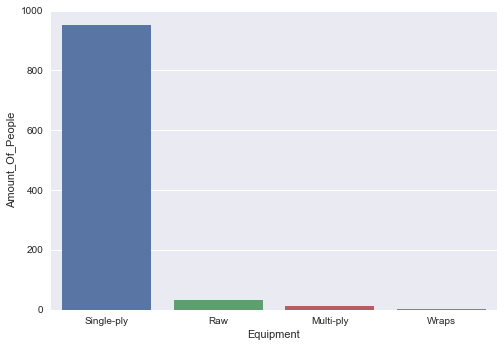

In [15]:
# Inspect only the we can go and inspect only the top five countries instead of the top ten
strongest_equipment = (strongest_countries['Equipment'].value_counts().head(5)).rename_axis('Equipment').reset_index(name='Count')

# graph this data frame
strongest_graph = sns.barplot(x='Equipment', y='Count', data=strongest_equipment)
strongest_graph.set(xlabel='Equipment', ylabel='Amount_Of_People')
sns.plt.show()

As clearly represented by the data, most if not all people in the top 1000 lifters use a Single-ply Powerlifting suit. Although it is not a surprising fact that this is the most common form of equipment due to its effectiveness, it is definitely surprising that the next most commonly used form of equipment is absolutely no equipment at all. In fact, it is surprising that raw is even mentioned in this graph, since it is easy to speculate that the top lifters must use some form of equipment to assist them throughout their lifts. 

### ---------------------------------------------------------------------------------------------------------------------------------------------------------------

# Part 4: Cleaning Data Further for Correlation and Regression Analysis

Now we will see the correlations between each attribute (Age, Country, Equipment). In order to do so, we will have to number the string values in the attribute columns that we need to facilitate analysis. We will number the attributes based on their alphabetic order:

Total: Dependent Variable
    N/A
Age: Independent Variable
    N/A
Country: Independent Variable
    USA-        1
    Russia-     2
    Ukraine-    3
    Finalnd-    4
    Czechia-    5
Equipment: Independent Variable
    Raw-        1
    Single-ply  2
    Wraps-      3
    Multi-ply   4

In [16]:
# Number the data to create simpler correlations
corr_df = strongest[['Total', 'Age', 'Country', 'Equipment']]

# First number the countries
corr_df = corr_df.replace(to_replace="USA", value=1)
corr_df = corr_df.replace(to_replace="Russia", value=2)
corr_df = corr_df.replace(to_replace="Ukraine", value=3)
corr_df = corr_df.replace(to_replace="Finland", value=4)
corr_df = corr_df.replace(to_replace="Czechia", value=5)

# Now number the equipment
corr_df = corr_df.replace(to_replace="Raw", value=1)
corr_df = corr_df.replace(to_replace="Single-ply", value=2)
corr_df = corr_df.replace(to_replace="Wraps", value=3)
corr_df = corr_df.replace(to_replace="Multi-ply", value=4)

# Use regex to only include the numeric values
corr_df = corr_df[corr_df.applymap(np.isreal).all(1)]

# Finally, get rid of all null values and convert country and equipment columns to int
corr_df = corr_df[pd.notnull(corr_df['Country'])]
corr_df = corr_df[pd.notnull(corr_df['Equipment'])]
corr_df['Country'] = corr_df['Country'].astype(str).astype(int)
corr_df['Equipment'] = corr_df['Equipment'].astype(str).astype(int)

# Now we are left with the remaining top lifters who are from the top five countries. Also, we have changed the 
# country and equpiment to their corresponding numeric values.
corr_df.head()

,Total,Age,Country,Equipment
787,755.08,19.0,1,1
791,705.48,41.0,1,1
801,1361.35,27.0,1,1
802,1284.19,27.0,1,1
809,1151.91,20.0,1,3


Now that we have cleaned the data to contain numeric values, we can start doing our analysis. 

### ---------------------------------------------------------------------------------------------------------------------------------------------------------------

# Part 5: Heatmap Correlation

First, we can create a correlation heatmap to view the correlations between these variables.

In [17]:
heatmap_df = corr_df.corr()
heatmap_df

,Total,Age,Country,Equipment
Total,1.000000,-0.223291,0.105934,0.102301
Age,-0.223291,1.000000,-0.019514,-0.071823
Country,0.105934,-0.019514,1.000000,0.094926
Equipment,0.102301,-0.071823,0.094926,1.000000


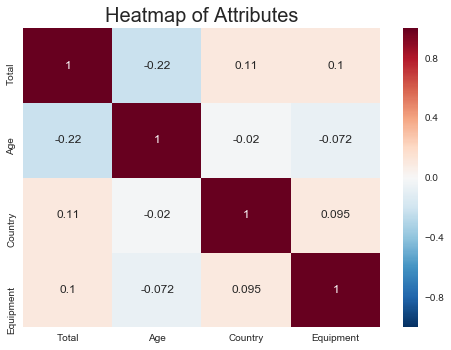

In [18]:
sns.heatmap(heatmap_df, annot=True)
plt.title("Heatmap of Attributes", fontsize=20)
plt.show()

From this heatmap, it is apparent that Age has the most effect on the Total. Age has a negative correlation because as individuals get older, their total weight lifted tends to decrease. Following Age, it seems that Country has the next highest correlation, followed by Equipment. These two correlations are especially weak. Let us run a multiple linear regression model to better understand the impact of these attributes on powerlifter's strength.

### ---------------------------------------------------------------------------------------------------------------------------------------------------------------

# Part 6: Multiple Linear Regression

Now, we can continue by doing a multiple linear regression using stats_model. We will be using multiple linear regression because we must see the effect of multiple independent variables on a dependent variable. Since we are analyzing the potential impact of our attributes on the total weight lifted, we can use the following null hypothesis:

***The attributes Age, Country, and Equipment have no impact on a powerlifer's strength.***

In [19]:
# y: dependent variable is the Total weight lifted
# X: independent variables consist of our attributes to test their correlation
y = corr_df['Total']
X = corr_df[['Age', 'Country', 'Equipment']]

# Add a constant to the independent variables
X = stat_mod_forms.add_constant(X)

# Display the model
model = stat_mod_forms.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Total   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     810.2
Date:                Mon, 10 Dec 2018   Prob (F-statistic):               0.00
Time:                        02:01:29   Log-Likelihood:            -2.5519e+05
No. Observations:               34314   AIC:                         5.104e+05
Df Residuals:                   34310   BIC:                         5.104e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1337.5840      9.627    138.941      0.000    1318.715    1356.453
Age           -6.8233      0.165    -41.265      0.000      -7.147      -6.499
Country       27.6617      1.537     17.998      0.000      24.649      30.674
Equipment     51.0831      3.448     14.817      0.000      44.326      57.841
==============================================================================
Omnibus:                      741.476   Durbin-Watson:                   0.686
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              499.369
Skew:                           0.177   Prob(JB):                    3.66e-109
Kurtosis:                       2.527   Cond. No.                         164.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### ---------------------------------------------------------------------------------------------------------------------------------------------------------------

# Part 7: Conclusion

A small p-value signifies evidence against the null hypothesis, whereas a large p-value signifies weak evidence against the null hypothesis. Therefore, since the p-value is extremely small for all the attributes, it can be stated that there is evidence against the notion that a Powerlifter's age, country, and equipment has no impact on the amount of weight he/she can lift. In other words, all three attributes have an impact on the amount of weight a Powerlifter can lift, according to our analysis.

From our heatmap and our multiple linear regression model, it can be said that Age has the largest effect on a Powerlifter's strength. This is a reasonable statement because as we have seen in the EDA section, we reach peak performance in lifting around the ages 24-39. Since most individuals enter Powerlifting competitions due to their abilities within this time frame, it can certainly be stated that age has an effect on the abilities of a Powerlifter. Similarly, it can be said that the country of origin has an effect on Powerlifter's strength due to our analysis with our multiple linear regression model. A country of origin can attest to the dietary habits, training habits, and even genetics of a Powerlifter. Finally, based on our linear regression model, we can state that equipment also plays a role in how much weight an individual can lift. This is because equipment has the ability to help Powerlifters move more weight in competitions. 

Therefore, since all three of the attributes have been shown to have evidence against the null hypothesis according to our multiple regression model, we can successfully reject the null hypothesis. As a result, we can conclude that all three attributes (Age, Country, and Equipment) have an impact on the strength of a Powerlifter.

#### Note: To reiterate, this notebook is analyzing data on many experienced Powerlifters. Extrapolating this data to the average human being may not be the best idea since there are many extraneous variables (lifestyle choices, years of experience, quality of nutrition, etc.) that greatly set apart average gym attendees to these experienced Powerlifters. With that being said, I hope you enjoyed the analysis conducted within this Jupyter notebook.

### ---------------------------------------------------------------------------------------------------------------------------------------------------------------